<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Иван! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
</br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

<font color='blue'>Ответы на мои комментарии лучше тоже помечать.

Например:</font><font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

<font color='blue' size=3><b>Комментарий ревьюера 3</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется.</font>

# Проект: Обучение с учителем, качество модели

# Описание задачи
Интернет-магазин «В один клик» продает различные товары: товары для детей, товары для дома, мелкую бытовую технику, косметику и продукты. Недавний отчет магазина показал снижение покупательской активности. Привлечение новых клиентов оказалось не столь эффективным, так как большая часть целевой аудитории уже знает о магазине.

Для увеличения покупательской активности было решено сосредоточиться на удержании существующих клиентов с помощью персонализированных предложений. Руководство компании стремится принимать решения на основе анализа данных и бизнес-моделирования. В рамках этого проекта, отделу цифровых технологий было поручено разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы стимулировать их покупательскую активность.

Проект включает два этапа:

Разработка модели, предсказывающей вероятность снижения покупательской активности.
Выделение сегмента покупателей, анализ их поведения и выработка рекомендаций по увеличению их активности.
Цель проекта — повысить покупательскую активность существующих клиентов за счет использования персонализированных предложений, что в конечном итоге должно способствовать росту выручки магазина.

## Загрузка данных

### Импортируем необходимые библиотеки

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import shap

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from phik.report import plot_correlation_matrix
from phik import report

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

### Загрузим все наборы данных и кратко ознакомимся с информацией о них

In [5]:
market_file = pd.read_csv('./datasets/market_file.csv')
market_file.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [5]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [7]:
market_money = pd.read_csv('./datasets/market_money.csv')
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [7]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [9]:
market_time = pd.read_csv('./datasets/market_time.csv')
market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [9]:
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [10]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [11]:
money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')
money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [12]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

##  Предобработка данных

### Проверим наличие пропусков в данных

In [13]:
market_file.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [14]:
market_money.isna().sum()

id         0
Период     0
Выручка    0
dtype: int64

In [15]:
market_time.isna().sum()

id        0
Период    0
минут     0
dtype: int64

In [16]:
money.isna().sum()

id         0
Прибыль    0
dtype: int64

### Проверим данные на наличие дубликатов

In [17]:
market_file['Тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [18]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [19]:
market_file.duplicated(keep='first').sum()

0

In [20]:
market_money.duplicated(keep='first').sum()

0

In [21]:
market_time.duplicated(keep='first').sum()

0

In [22]:
money.duplicated(keep='first').sum()

0

Краткий вывод по загрузке и предобработке данных:
- Загружены данные из файлов: market_file.csv, market_money.csv, market_time.csv и money.csv.
- Проведена проверка данных на пропуски и дубликаты (не выявлено).
- Исправление опечаток в названиях столбцов и категориальных данных.

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Здесь заканчивается структурный блок работы - стоит сделать промежуточные выводы о проделанной работе в блоке.~~</font>

## Исследовательский анализ данных

### Визуализируем каждый признак для выявления аномалий и дисбаланса классов

#### Добавим функцию, которая будет визуализировать количественный признак

In [23]:
def num_graph(name, unit_name, df):
    # Создание ящика с усами
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    sns.boxplot(data=df[name], orient='h', ax=ax1)
    ax1.set_title(f'Ящик с усами для параметра "{name}"')
    ax1.set_xlabel(unit_name)
    
    # Создание гистограммы
    sns.histplot(df[name], ax=ax2, kde=True)
    ax2.set_title(f'Распределение параметра "{name}"')
    ax2.set_xlabel(unit_name)
    ax2.set_ylabel('Количество записей')
    
    plt.show()

#### Добавим функцию, которая будет визуализировать категориальный признак

In [24]:
def col_graph(name, df):
    fig, ax1 = plt.subplots(figsize=(7, 7))
    df[name].value_counts().plot(
        kind = 'pie',
        fontsize = 14,
        legend = True,
        autopct='%.1f%%',
        labels=None
    )
    ax1.set_title(f'Распределение признака "{name}"')
    
    plt.show()

#### Датасет market_file

##### Покупательская активность

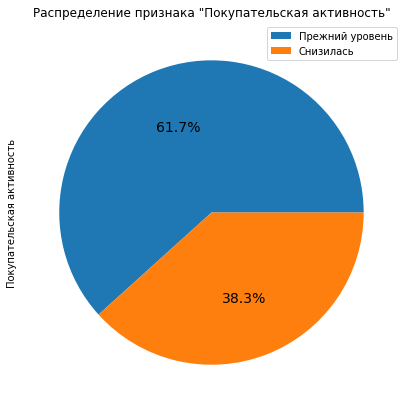

In [25]:
col_graph("Покупательская активность", market_file)

##### Тип сервиса

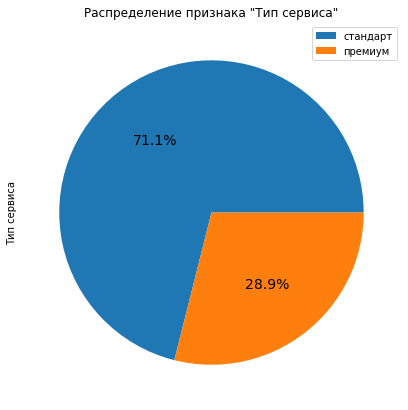

In [26]:
col_graph("Тип сервиса", market_file)

##### Разрешить сообщать

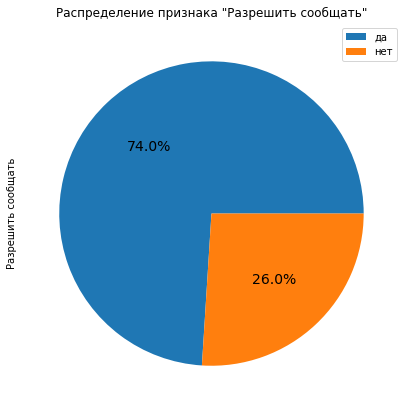

In [27]:
col_graph("Разрешить сообщать", market_file)

##### Маркет актив 6 мес

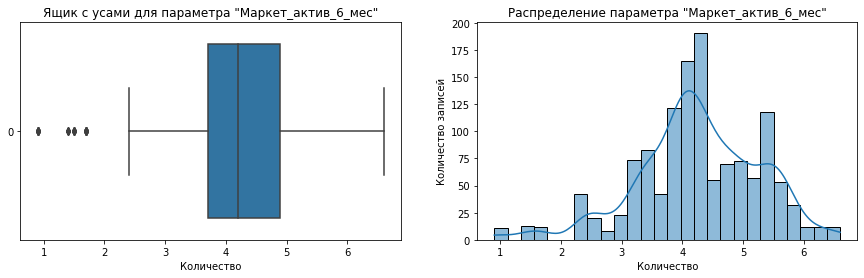

In [28]:
num_graph("Маркет_актив_6_мес", 'Количество', market_file)

##### Маркет актив тек мес

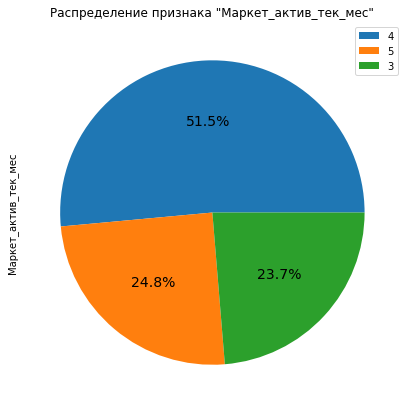

In [29]:
col_graph("Маркет_актив_тек_мес", market_file)

##### Длительность

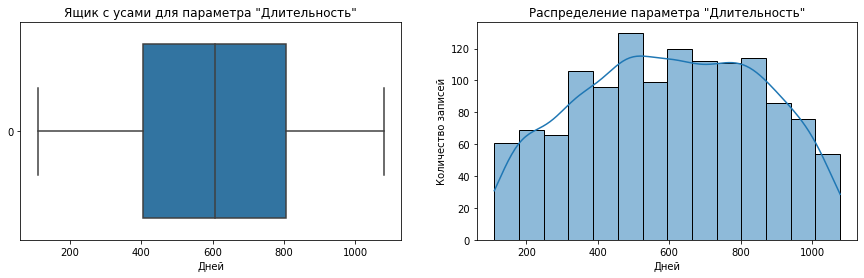

In [30]:
num_graph("Длительность", 'Дней', market_file)

##### Акционные покупки

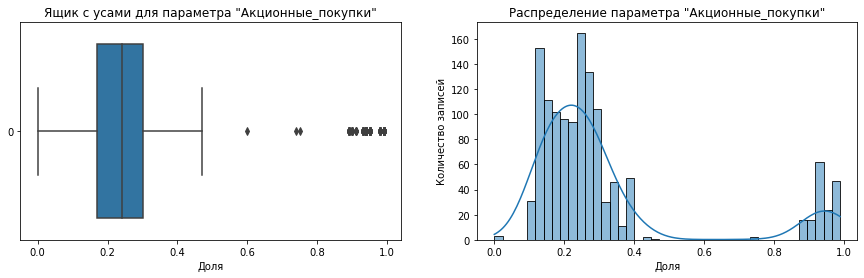

In [31]:
num_graph("Акционные_покупки", 'Доля', market_file)

##### Популярная категория

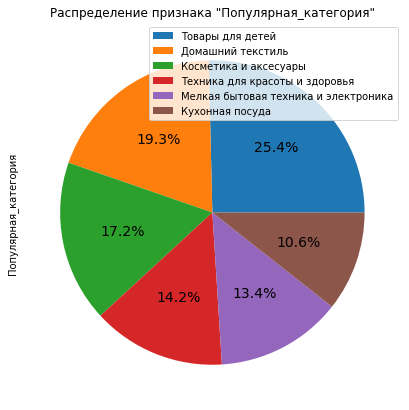

In [32]:
col_graph("Популярная_категория", market_file)

##### Средний просмотр категорий за визит

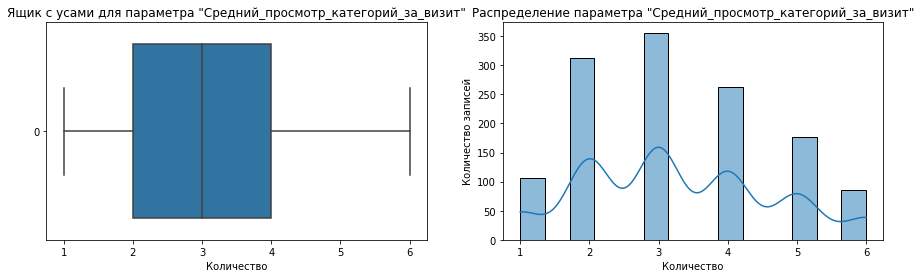

In [33]:
num_graph("Средний_просмотр_категорий_за_визит", 'Количество', market_file)

##### Неоплаченные продукты штук квартал

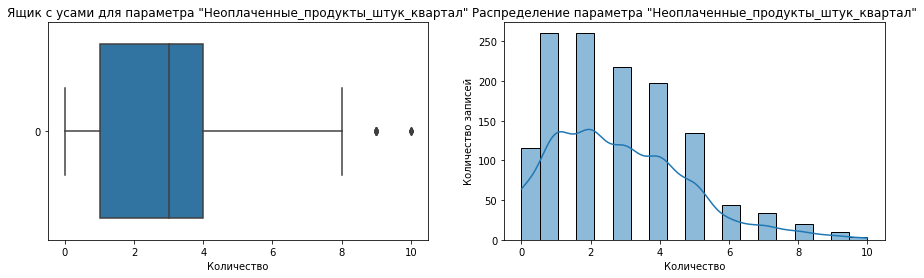

In [34]:
num_graph("Неоплаченные_продукты_штук_квартал", 'Количество', market_file)

##### Ошибка cервиса

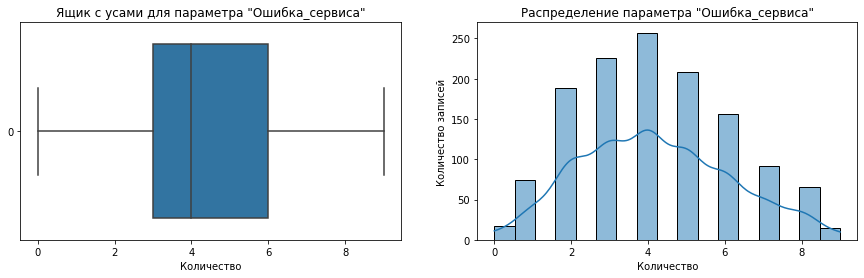

In [35]:
num_graph("Ошибка_сервиса", 'Количество', market_file)

##### Страниц за визит

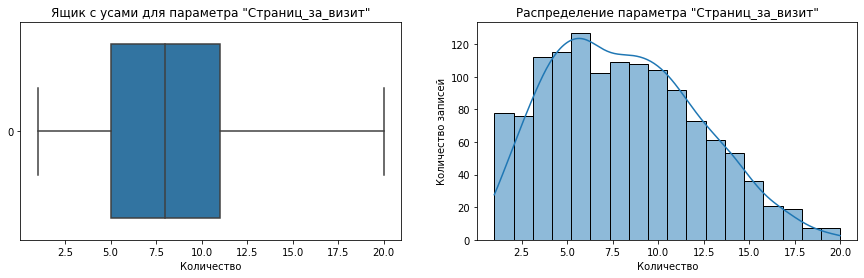

In [36]:
num_graph("Страниц_за_визит", 'Количество', market_file)

#### Датасет market_money

##### Период

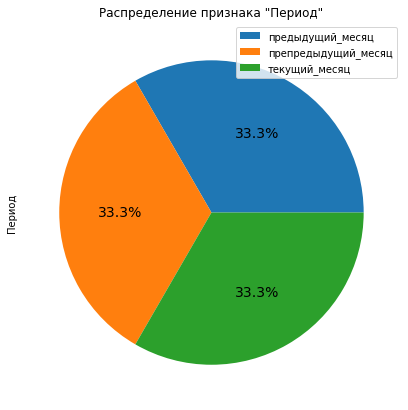

In [37]:
col_graph('Период', market_money)

##### Выручка

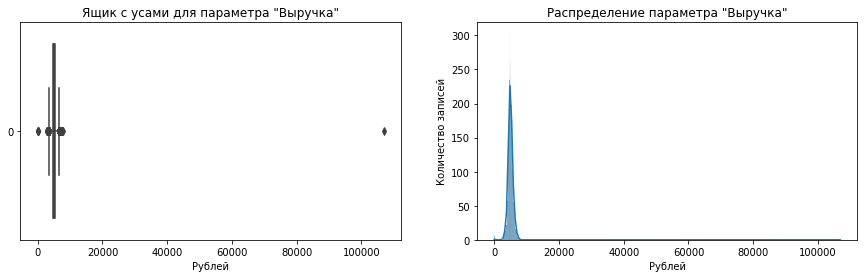

In [38]:
num_graph('Выручка', 'Рублей', market_money)

На графиках явно выражен выброс около 100000 рублей. Заменим это значение на среднее по предыдущим периодам для данного пользователя.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Действительно явный выброс.
Можно удалить, а можно и заполнить, например значением предыдущего месяца.</font>

In [39]:
id = int(market_money[market_money['Выручка'] > 20000]['id'])
market_money.loc[(market_money['Выручка'] > 20000) & (market_money['id'] == id), 'Выручка'] = \
    market_money[(market_money['id'] == id) & (market_money['Выручка'] < 20000)]['Выручка'].mean()

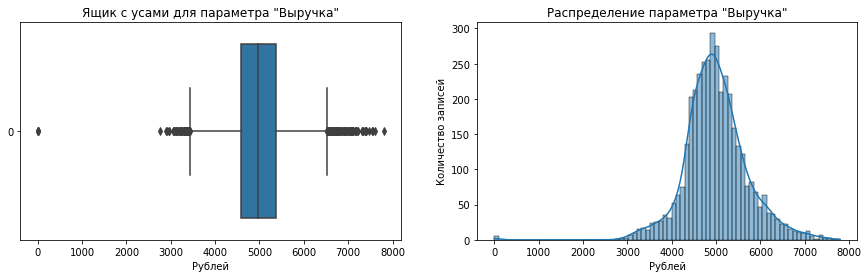

In [40]:
num_graph('Выручка', 'Рублей', market_money)

#### Датасет market_time

##### Период

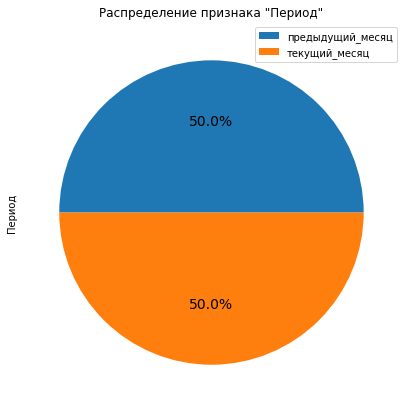

In [41]:
col_graph('Период', market_time)

##### Минут

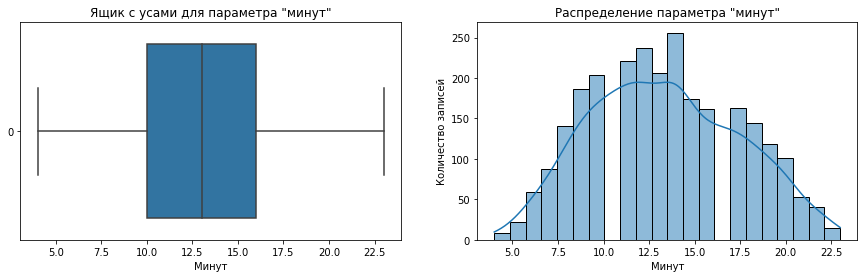

In [42]:
num_graph('минут', 'Минут', market_time)

### Датасет money

##### Прибыль

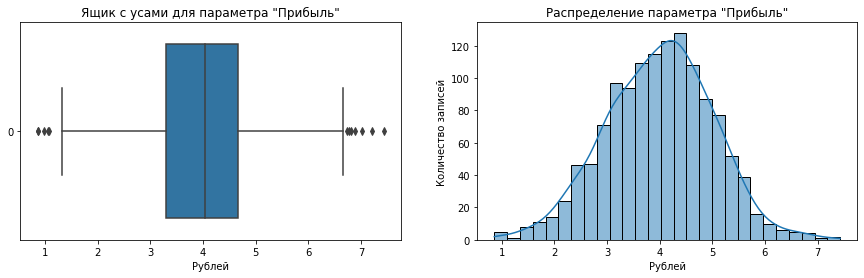

In [43]:
num_graph('Прибыль', 'Рублей', money)

Вывод по исследовательскому анализу: в данных выявлен дисбаланс классов (признаки "Разрешить сообщать", "Тип сервиса", "Покупательская активность"), а также неравномерное распределение количественных значений (столбцы "Акционные покупки", "Маркет актив 6 мес"). При проектировании моделей для повышения их качества следует учитывать данную проблему.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Хорошая работа в части исследования данных: молодец, что используешь функции, а также применяешь подходящие для типов данных инструменты.</font>

## Объединение таблиц

In [44]:
market_money['Выручка_текущий_месяц'] = market_money.loc[market_money['Период'] == 'текущий_месяц', 'Выручка']
market_money.loc[market_money['Выручка_текущий_месяц'].notna(), 'Выручка_предыдущий_месяц'] = \
    market_money.loc[market_money['Период'] == 'предыдущий_месяц', 'Выручка'].values
market_money.loc[market_money['Выручка_текущий_месяц'].notna(), 'Выручка_препредыдущий_месяц'] = \
    market_money.loc[market_money['Период'] == 'препредыдущий_месяц', 'Выручка'].values

market_money.dropna(inplace = True)
market_money.drop(['Период', "Выручка"], axis = 1, inplace = True)

market = market_file.merge(market_money, on = 'id')

market_time['Время_посещения_текущий_месяц'] = market_time.loc[market_time['Период'] == 'текущий_месяц', 'минут']
market_time.loc[market_time['Время_посещения_текущий_месяц'].notna(), 'Время_посещения_предыдущий_месяц'] = \
    market_time.loc[market_time['Период'] == 'предыдущий_месяц', 'минут'].values

market_time.dropna(inplace = True)
market_time.drop(['Период', "минут"], axis = 1, inplace = True)

market = market.merge(market_time, on = 'id')

market.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Время_посещения_текущий_месяц,Время_посещения_предыдущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,3293.1,0.0,0.0,14.0,13.0
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10.0,12.0
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13.0,8.0
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13.0,11.0
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11.0,8.0


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Таблицы можно "развернуть вширь" по id  методом pivot_table. Необязательно прописывать каждую колонку.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Верно, при объединении таблиц нужно привязаться к уникальному `"id"`.</font>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    Что делать с этими тремя пользователями? У них отсутствует Выручка за два предыдущих месяца, что портит общую картину. Но стоит ли их удалять?
<br>
</div>

<font color='blue'><b>Комментарий ревьюера : </b></font> \
<font color='blue'> У этих клиентов выручка только за один месяц (текущий), поэтому таргет "Снизилась" - явно ошибка, активность не могла снизиться: эти клиенты только пришли )).\
Их нужно удалить из данных.</font>
```text
Отберите клиентов с покупательской активностью не менее трёх месяцев.
```

In [45]:
market[(market['Выручка_предыдущий_месяц'] == 0) | (market['Выручка_препредыдущий_месяц'] == 0) | (market['Выручка_текущий_месяц'] == 0)]

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Время_посещения_текущий_месяц,Время_посещения_предыдущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5,3293.1,0.0,0.0,14.0,13.0
9,215357,Снизилась,стандарт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5,5986.3,0.0,0.0,6.0,12.0
11,215359,Снизилась,стандарт,да,4.6,5,110,0.0,Домашний текстиль,4,2,4,2,4735.0,0.0,0.0,11.0,13.0


In [46]:
market = market[(market['Выручка_предыдущий_месяц'] != 0) & (market['Выручка_препредыдущий_месяц'] != 0) & (market['Выручка_текущий_месяц'] != 0)]

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Неактивные удалены 👌</font>

## Корреляционный анализ

### Используем VIF для определения корреляции между параметрами

In [47]:
num_columns = ['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки',
               'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
               'Страниц_за_визит', 'Выручка_текущий_месяц', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 
               'Время_посещения_текущий_месяц', 'Время_посещения_предыдущий_месяц']

col_columns = ['Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_тек_мес', 'Популярная_категория']

target = 'Покупательская активность'

X = market.drop(columns=col_columns+[target, 'id'])

X['constant'] = 1

vif_data = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

print(vif_data)

Маркет_актив_6_мес                       1.214470
Длительность                             1.079220
Акционные_покупки                        1.185924
Средний_просмотр_категорий_за_визит      1.178079
Неоплаченные_продукты_штук_квартал       1.196605
Ошибка_сервиса                           1.065415
Страниц_за_визит                         1.417577
Выручка_текущий_месяц                    3.889496
Выручка_предыдущий_месяц                 4.256827
Выручка_препредыдущий_месяц              1.611106
Время_посещения_текущий_месяц            1.317501
Время_посещения_предыдущий_месяц         1.526692
constant                               308.307218
dtype: float64


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Можно использовать коэффициент корреляции $\phi_K$ , это передовой способ вычисления коэффициентов корреляции для любых типов признаков. Кроме того, в библиотеке есть визуализация. Стоит учитывать, что этот коэффициент показывает не только линейные связи, но и нелинейные. Более подробно понять вид связи поможет визуализация с помощью диаграмм рассеяния. Ссылка на документацию: https://phik.readthedocs.io/en/latest/
Пример кода:</font>
```python
from phik.report import plot_correlation_matrix
from phik import report

# список интервальных признаков
interval_cols = [...]

# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = df.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)
```

<div class="alert alert-info">
<b>Комментарий студента:</b>
    Я проверил корреляцию через phik и она тоже указывает на выручку за текущий и предыдущий месяц. Больше новой информации не было, поэтому я не буду менять метод в этой работе.
<br>
</div>

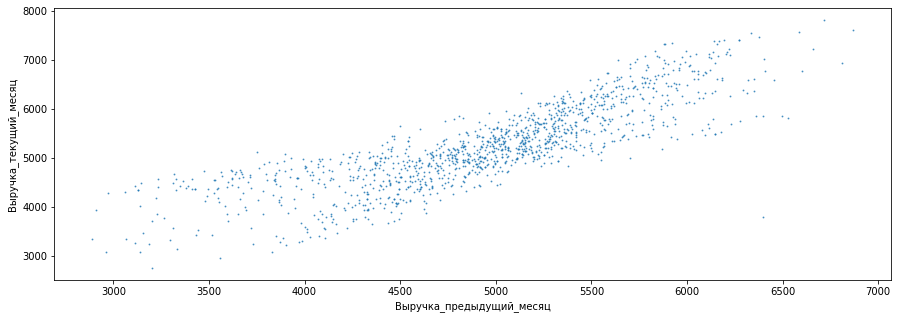

In [48]:
market.plot.scatter(x = 'Выручка_предыдущий_месяц', y = 'Выручка_текущий_месяц', s = 0.8, alpha=0.7, figsize=(15, 5))

plt.show()

Между выручкой за текущий и предыдущий месяц наблюдается корреляция. Возможно, это связано с тем, что пользователи, купившие какой-либо товар в предыдущем месяце, На этапе обучения модели выяснилось, что отсутствие признака "Выручка_текущий_месяц" повышает точность на 2%.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

## Использование пайплайнов

### Обучение лучшей модели с помощью пайплайнов

In [49]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    market.drop([target, 'Выручка_текущий_месяц', 'id'], axis=1),
    market[target],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market[target])

ohe_columns = ['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']
ord_columns = ['Маркет_актив_тек_мес']
num_columns = ['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки',
               'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
               'Страниц_за_визит', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 
               'Время_посещения_текущий_месяц', 'Время_посещения_предыдущий_месяц']

# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
    )

# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    [3, 4, 5]
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# Data preprocessing
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# Final pipe
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


param_grid = [
    # DecisionTreeClassifier
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,10),
        'models__max_features': range(2,5),
        'models__min_samples_split': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    #  KNeighborsClassifier
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 20),
        'models__weights': ['uniform', 'distance'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },

    # LogisticRegression_l1
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            penalty='l1'
        )],
        'models__C': np.arange(1, 5, 1),
        'models__solver': ['liblinear', 'saga'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # LogisticRegression_l2
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            penalty='l2'
        )],
        'models__C': np.arange(1, 5, 1),
        'models__solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # LogisticRegression_elasticnet
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='saga', 
            penalty='elasticnet'
        )],
        'models__C': np.arange(1, 5, 1),
        'models__l1_ratio': np.arange(0, 1, 0.1),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # SVC
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            probability= True
        )],
        'models__C': np.arange(1, 5, 1),
        'models__kernel': ['linear', 'rbf', 'sigmoid', 'precomputed'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # SVC_poly
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            kernel = 'poly',
            probability= True
        )],
        'models__C': np.arange(1, 5, 1),
        'models__degree': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
]


gs = GridSearchCV(
  pipe_final,
  param_grid,
  scoring='roc_auc',
  n_jobs=-1
)

warnings.filterwarnings("ignore")

gs.fit(X_train, y_train)

print("Значение метрики на тренировочной выборке: ", gs.best_score_)

Значение метрики на тренировочной выборке:  0.9203836721018538


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~В SVC нужно передать аргумент probability= True. Что бы можно было работать с вероятностями, если модель выиграет.~~</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

In [50]:
y_pred = gs.predict_proba(X_test)
print("Значение метрики на тестовой выборке: ", roc_auc_score(y_test, y_pred[:,1]))

Значение метрики на тестовой выборке:  0.9219226448403146


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

In [3]:
gs.best_estimator_

NameError: name 'gs' is not defined

Моделью с наивысшей точностью оказалась KNeighborsClassifier c количеством соседей равным 14. Метрика ROC_AUC была выбрана из-за ее устойчивости к несбалансированным классам.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

## Анализ важности признаков

### Построение графика важности признаков с помощью метода Permutation importance. 

In [2]:
result = permutation_importance(gs, X_test, y_test, scoring='roc_auc', random_state = RANDOM_STATE, n_repeats = 40)
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': result['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)) 
plt.show()

NameError: name 'gs' is not defined

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Нужен анализ важности с помощью метода SHAP.~~</font>\
[Доки](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html#:~:text=.initjs()-,K%2Dnearest%20neighbors,-%EF%83%81)\
[Stackoverflow](https://stackoverflow.com/questions/73320956/how-to-plot-knn-using-shap-kernelexplainer)</font>

### Построение графика важности признаков с помощью SHAP. 

  0%|          | 0/100 [00:00<?, ?it/s]

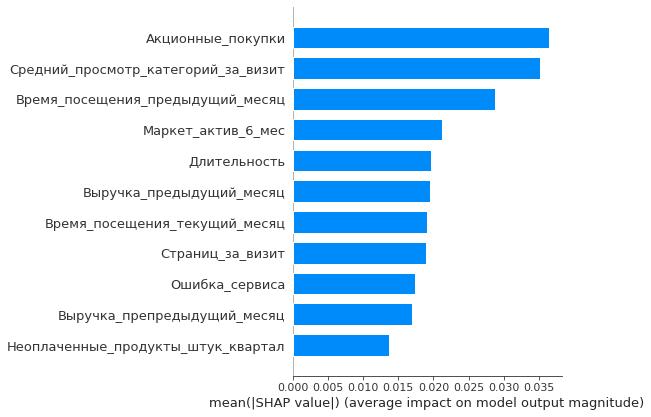

In [58]:
X = market[num_columns]
y = market[target].replace({'Снизилась':0, 'Прежний уровень':1})

scaler = StandardScaler()
X_train = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=14, weights='distance')
knn.fit(X_train, y)

X_train = X_train[:100]

shap_explainer = shap.KernelExplainer(knn.predict, X_train)

shap_values = shap_explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, feature_names=X.columns, plot_type='bar')
plt.show()

https://github.com/shap/shap/issues/1362

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'> ~~По заданию нужен SHAP~~</font>
```text
7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 
```

<div class="alert alert-info">
<b>Комментарий студента:</b>
    К сожалению, KNeighborsClassifier работает только с KernelExplainer, подружить который с кодировщиками категориальных данных не получилось. Поэтому, для выполнения задания, я обучил другую модель только на количественных данных (результат примерно идентичный). Как по мне, Permutation importance работает лучше с KNN
<br>
</div>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> \
<font color='blue'> Имена признаков после кодировки передаётся в KernelExplainer в аргумент feature_names.\
Определяем имена в препроцессоре:\
Проще всего обновить sklearn до последней версии, тогда у ColumnTransformer появится метод `get_features_names_out`, Но можно добраться до OHE отдельно, а остальные добавить из списков ord и num.
```python
ohe_feature_names = best_model.named_steps['preprocessor'].transformers_[0][1].named_steps['ohe'].get_feature_names().tolist()
```
Посмотреть версию библиотеки можно так:
```python
import sklearn
sklearn.__version__
```
Обновить до последней версии:</font>
```
!pip install -Uq scikit-learn
```</font>

Анализ графиков показал, что наибольшее влияние на принятие решения моделью оказывают признаки "Акционные_покупки", "Страниц_за_визит" и "Время_посещения_текущий_месяц". Наименьшее влияние оказывают признаки "Разрешить_сообщать" и "Маркет_актив_тек_месяц".

Для принятия более обоснованных и точных бизнес-решений следует обратить внимание на следующие аспекты:
- Количество и прибыльность акционных товаров. Наличие и размер скидок часто играют решающую роль в покупке товаров, однако следует учитывать уменьшение прибыли от таких продаж.
- Привлекательность и удобство использования сайта, что существенно влияет на решение пользователя о покупке товара в данном интернет-магазине.
- Содержание маркетинговых коммуникаций с пользователем и дополнительные предложения о товаре. В настоящее время наличие или отсутствие таких коммуникаций и предложений не оказывает значительного влияния на покупательскую активность пользователя.

## Сегментация покупателей

<font color='blue'><b>Комментарий ревьюера : </b></font> ❌

```text
8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.
```
<font color='red'> Попробую описать, что мы должны сделать:

Самое важное − мы должны по заданию выбрать некоторый сегмент пользователей, обосновать выбор сегмента, обосновать то, как мы этот сегмент определяем (почему выбираем такие значения признаков для отбора пользователей в сегмент), а дальше исследовать только этот сегмент.

При выделении сегмента нужно опираться на две шкалы:
- вероятность снижения, предикты лучшей модели полученые методом `predict_proba`() по интересующему нас классу ("Снизилось"), и
- Прибыль от клиентов из таблицы money.csv
    
Границы сегмента по этим двум шкалам можно определить самостоятельно, например по диаграмме рассеяния, где по одной оси будет результат моделирования (вероятность снижения), а по другой прибыль.
    
Далее проводим Анализ данных по выбраному сегменту и какой нибудь группы клиентов, например, которые посещают мало страниц.\
Формулируем предложение по работе с сегментом для увеличения покупательской активности.</font>

### Выберем клиентов с вероятностью снижения активности больше 0.5 и прибылью больше 3.0

Обоснование: покупатели с высокой вероятностью снижения активности (больше 0.5) представляют собой группу, которую интернет-магазин «В один клик» рискует потерять. Однако, если эти клиенты приносят значительную прибыль (больше 3.0), их потеря будет ощутимой для бизнеса.

#### Объеденим данные датафреймов money и market

In [54]:
market = pd.merge(market, money, on='id')
market.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Время_посещения_текущий_месяц,Время_посещения_предыдущий_месяц,Прибыль
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10.0,12.0,4.16
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13.0,8.0,3.13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13.0,11.0,4.87
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11.0,8.0,4.21
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0,10.0,10.0,3.95
5,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5869.6,5685.0,4503.0,12.0,11.0,3.62
6,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3772.6,3263.0,4749.0,10.0,12.0,5.26
7,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4566.4,4146.5,4433.0,7.0,6.0,4.93
8,215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,4209.5,3488.0,4727.0,10.0,14.0,3.06
9,215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7,5834.9,5304.5,5555.0,6.0,9.0,4.55


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

#### Построим диаграмму рассеяния вероятности снижения покупательской активности и прибыли

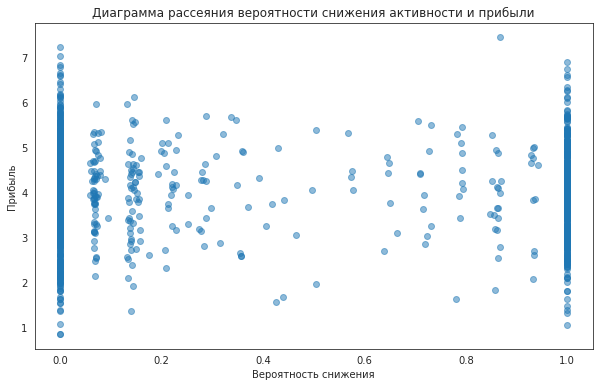

In [55]:
X = market.drop([target, 'Выручка_текущий_месяц', 'Прибыль', 'id'], axis=1)
probabilities = gs.predict_proba(X)
market['Вероятность снижения'] = probabilities[:, 1]


plt.figure(figsize=(10, 6))
plt.scatter(market['Вероятность снижения'], market['Прибыль'], alpha=0.5)
plt.xlabel('Вероятность снижения')
plt.ylabel('Прибыль')
plt.title('Диаграмма рассеяния вероятности снижения активности и прибыли')
plt.show()

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

#### Выделим интересующий нас сегмент

In [56]:
segment = market[(market['Вероятность снижения'] > 0.5) & (market['Прибыль'] > 3.0)]
segment.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Время_посещения_текущий_месяц,Время_посещения_предыдущий_месяц,Прибыль,Вероятность снижения
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10.0,12.0,4.16,1.000000
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13.0,8.0,3.13,1.000000
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13.0,11.0,4.87,0.862581
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11.0,8.0,4.21,1.000000
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0,10.0,10.0,3.95,0.717106
5,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5869.6,5685.0,4503.0,12.0,11.0,3.62,0.716269
7,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4566.4,4146.5,4433.0,7.0,6.0,4.93,0.860258
8,215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,4209.5,3488.0,4727.0,10.0,14.0,3.06,1.000000
9,215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7,5834.9,5304.5,5555.0,6.0,9.0,4.55,1.000000
10,215361,Снизилась,стандарт,да,5.1,4,199,0.23,Техника для красоты и здоровья,4,5,2,3,3789.7,6400.0,4597.0,13.0,11.0,4.03,1.000000


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

### Проведем анализ клиентов, которые посещают мало страниц или имеют маленькое время посещения сайта в текущем месяце.

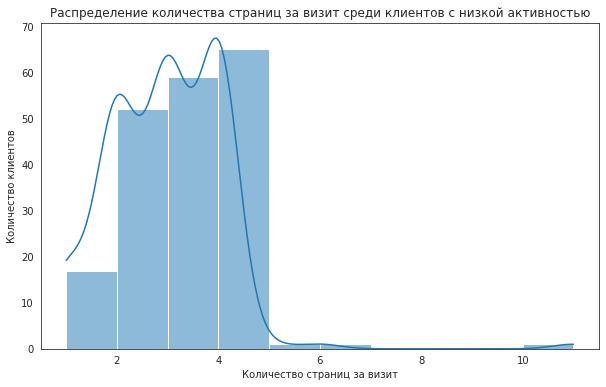

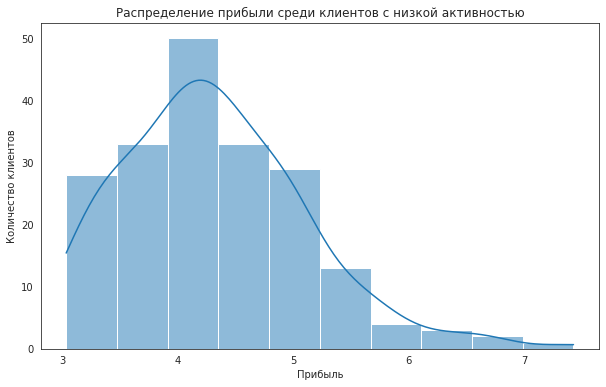

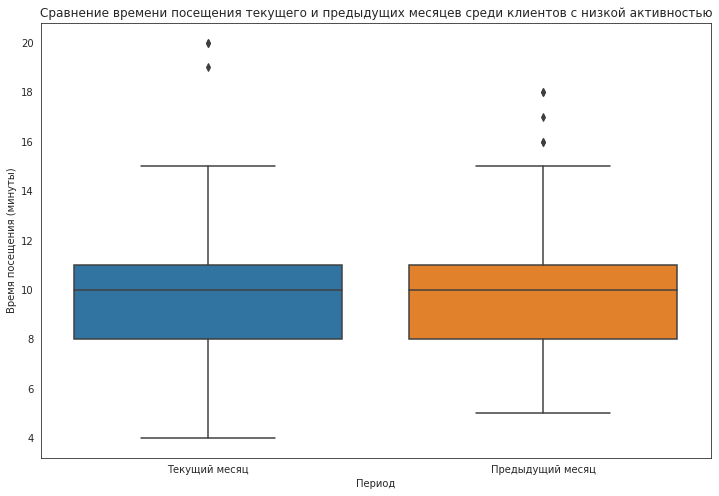

In [57]:
low_time_or_page = segment[(segment['Страниц_за_визит'] < 5) | (segment['Время_посещения_текущий_месяц'] < 6)]

# Гистограмма количества посещенных страниц
plt.figure(figsize=(10, 6))
sns.histplot(low_time_or_page['Страниц_за_визит'], bins=10, kde=True)
plt.xlabel('Количество страниц за визит')
plt.ylabel('Количество клиентов')
plt.title('Распределение количества страниц за визит среди клиентов с низкой активностью')
plt.show()

# Гистограмма прибыли
plt.figure(figsize=(10, 6))
sns.histplot(low_time_or_page['Прибыль'], bins=10, kde=True)
plt.xlabel('Прибыль')
plt.ylabel('Количество клиентов')
plt.title('Распределение прибыли среди клиентов с низкой активностью')
plt.show()

# Диаграмма размаха для времени посещения
plt.figure(figsize=(12, 8))
sns.boxplot(data=low_time_or_page[['Время_посещения_текущий_месяц', 'Время_посещения_предыдущий_месяц']])
plt.xlabel('Период')
plt.ylabel('Время посещения (минуты)')
plt.title('Сравнение времени посещения текущего и предыдущих месяцев среди клиентов с низкой активностью')
plt.xticks([0, 1], ['Текущий месяц', 'Предыдущий месяц'])
plt.show()

Рекомендации для заказчика:

1. Улучшение пользовательского опыта:
    - Снизить количество ошибок сервиса. Провести анализ причин ошибок и устранить основные проблемы, которые могут негативно влиять на пользовательский опыт.
2. Увеличение вовлеченности:
    - Разработать стратегию по увеличению количества посещаемых страниц. Например, улучшить навигацию, рекомендательную систему и предложить персонализированные предложения.
3. Акционные предложения:
    - Предлагать целевые акции и скидки для клиентов с высокой вероятностью снижения активности, чтобы стимулировать их к возвращению и совершению покупок.
4. Программа лояльности:
    - Ввести программу лояльности, которая будет мотивировать клиентов оставаться с компанией и совершать повторные покупки. Предлагать бонусы и дополнительные скидки за активное участие.
5. Анализ и персонализация:
    - Провести детальный анализ предпочтений клиентов в этом сегменте и предложить персонализированные рекомендации и контент.     - Использовать данные о предыдущих покупках и поведении на сайте для создания индивидуальных предложений.

<div class="alert alert-info">
<b>Комментарий студента:</b>
    Можно просто продублировать рекомендации в общий вывод?
<br>
</div>

## Общий вывод

Описание задачи: Интернет-магазин «В один клик» столкнулся с проблемой снижения покупательской активности. Привлечение новых клиентов стало неэффективным, поэтому необходимо сосредоточиться на удержании активности постоянных клиентов через персонализированные предложения. Задача состоит в разработке модели, которая предскажет вероятность снижения покупательской активности, и в выделении сегмента покупателей с последующими рекомендациями по увеличению их активности.

Исходные данные и предобработка:
- Данные из файлов: market_file.csv, market_money.csv, market_time.csv, money.csv.
- Проверка данных на пропуски и дубликаты (не выявлено).
- Исправление опечаток в названиях столбцов.
- Устранение выбросов в признаке "Выручка" путем замены на средние значения для соответствующих пользователей.

Поиск лучшей модели:
1.	Проведен исследовательский анализ данных, выявлены дисбаланс классов и неравномерное распределение количественных признаков.
2.	Для подготовки данных использовались пайплайны и ColumnTransformer:
    - Раздельная обработка количественных и категориальных признаков.
    - Кодирование категориальных признаков и масштабирование количественных.
3.	Обучение моделей:
    - KNeighborsClassifier
    - DecisionTreeClassifier
    - LogisticRegression
    - SVC
4.	Подбор гиперпараметров c помощью GridSearch.
5. Луччшая модель:
    - Модель KNeighborsClassifier с числом соседей, равным 14, показала наивысшую точность предсказания снижения покупательской активности.
    
Рекомендации для заказчика:

Анализ важности признаков:
- Наибольшее влияние на решение модели оказывают признаки "Акционные покупки", "Страниц за визит" и "Время посещения текущий месяц".
- Наименьшее влияние оказывают признаки "Разрешить сообщать" и "Маркет актив текущий месяц".
Рекомендации для сегмента покупателей:
1. Улучшение пользовательского опыта:
    - Снизить количество ошибок сервиса. Провести анализ причин ошибок и устранить основные проблемы, которые могут негативно влиять на пользовательский опыт.
2. Увеличение вовлеченности:
    - Разработать стратегию по увеличению количества посещаемых страниц. Например, улучшить навигацию, рекомендательную систему и предложить персонализированные предложения.
3. Акционные предложения:
    - Предлагать целевые акции и скидки для клиентов с высокой вероятностью снижения активности, чтобы стимулировать их к возвращению и совершению покупок.
4. Программа лояльности:
    - Ввести программу лояльности, которая будет мотивировать клиентов оставаться с компанией и совершать повторные покупки. Предлагать бонусы и дополнительные скидки за активное участие.
5. Анализ и персонализация:
    - Провести детальный анализ предпочтений клиентов в этом сегменте и предложить персонализированные рекомендации и контент.     - Использовать данные о предыдущих покупках и поведении на сайте для создания индивидуальных предложений.
6.	Эффективность маркетинговых коммуникаций:
    - Разработать персонализированные предложения, ориентированные на предпочтения пользователей, согласившихся на рассылку, и изменить подход к пользователям, не согласившимся на получение информации.

Эти шаги помогут удерживать активность постоянных клиентов и повысить общую выручку интернет-магазина «В один клик».

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Иван, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'>Иван, большое спасибо за доработку.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Выведи важность признаков с shap.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='darkorange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 3</b></font>\
<font color='green'> Иван, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>